In [1]:
# 'gLLAQcededffiikajwn_011220' doesn't work for finding minimum normalized dilatation for some reason.
# 'hLLAAkcededfggiikajwxn_0112201',
# 'iLLAMMccdecffghhhsermstqs_12220120'
# ivLAAQcecefghhghfbbaaafbb_12222010
# iLLLQPcbeegefhhhhhhahahha_01110221
# Same with 'gLPLQbdcfeffhbbaabg_120011'
# and 'hLALMkbcbefggghhwsemws_2112201'

# takes long and doesn't work: jLALMPPbcbefgghiihhwsemstqs_211220120

# The latter two have to do with mathemtica's replaceAll in the get_dila function

In [2]:
load('VeeringGeneralFunctions.sage')

In [3]:
sig = 'fLLQcbecdeepuwsua_20102'

In [4]:
cone = get_fibered_cone(sig)
cone.Hilbert_basis()

N( 0, -1),
N(-1,  2)
in 2-d lattice N

In [5]:
min_dir = get_minimal_direction(sig)
min_dir

(-0.6329743192009475, 0.6329743192009475)

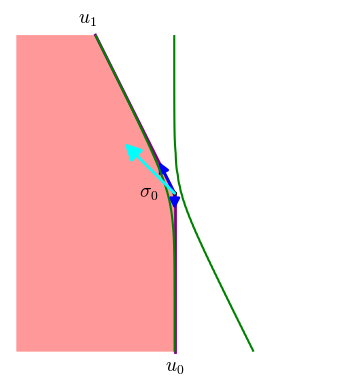

In [6]:
get_fibered_cone_and_levset_plot(sig) + arrow((0, 0), (min_dir[0]*5, min_dir[1]*5), color='cyan')

In [7]:
minimum = get_min_norm_dila_log_mathematica_approx(sig)
minimum

2.531897276802637

In [8]:
get_Thurston_norm(sig)

-6*a0 - 2*a1

In [9]:
get_LES_boundary_maps(sig)

[(-7*a0 - 2*a1, 3*a0 + a1), (-7*a0 - 4*a1, -2*a0 - a1)]

In [10]:
get_LES_boundary_matrices(sig)

[
[-7 -2]  [-7 -4]
[ 3  1], [-2 -1]
]

From the above we can see that the number of singularities for a class $(a_0,a_1)$ is:
$$\begin{align*}
    &\gcd(-7a_0-2a_1,3a_0+a_1) + \gcd(-7a_0-4a_1,-2a_0-a_1) \\
    &= \gcd(-a_0,3a_0+a_1) + \gcd(a_0,-2a_0-a_1) \\
    &= \gcd(a_0,a_1) + \gcd(a_0,a_1) \\
    &= 1 + 1 \\
    &= 2
\end{align*}$$
since we are assuming $(a_0,a_1)$ is primitive.
Thus every primitive class has exactly $2$ singularities.

In particular, this tells us that each genus is only realized on one level set of the Thurston norm, as fixing the genus fixes the Thurston norm.
And conversely, on each level set of the Thurston norm all the primitive classes have the same genus; there is a one-to-one correspondence between the Thurston norm and genus.

Hence, on each level set of the Thurston norm, the class closest to the minimizer is the one with the smallest dilatation out of the classes with genus corresponding to that norm. It follows that, on this manifold, the sequence of least dilatations raised to the genus power converges to the square root of the minimizer.

In [11]:
m('cone = ConicHullRegion[{{0, 0}}, {{0, -1}, {-1, 2}}]')
m('Reduce[{a, b} \[Element] cone, {a, b}]')

a <= 0 && b <= -2*a

In [12]:
m('Reduce[-6*a - 2*b == n && {a, b} \[Element] cone && n \[Element] Reals, {a, b}]')

((n == 0 && a == 0) || (n > 0 && Inequality[-1/2*n, LessEqual, a, LessEqual, 
    0])) && b == (-6*a - n)/2

In [13]:
points = []
for n in range(10):
    if n % 2 == 0:
        for a in range(-n/2, 1):
            b = (-6*a - n)/2
            if cone.interior_contains(a,b) and gcd(a,b) == 1:
                points.append(((a,b), get_genus(sig,(a,b))))

In [14]:
points

[((-1, 1), 2), ((-2, 3), 3), ((-1, 0), 3), ((-3, 5), 4), ((-1, -1), 4)]

In [16]:
for n in range(25):
    print('Thurston norm ' + str(n))
    for a in range(-floor(n/2), 1):
        b = (-6*a - n)/2
        if cone.interior_contains(a,b) and gcd(a,b) == 1:
            print(' \t' + str((a,b)) + ' has genus ' + str(get_genus(sig,(a,b))) + ' and dilatation ' + str(get_dila_mathematica(sig, (a,b))))

Thurston norm 0
Thurston norm 1
Thurston norm 2
Thurston norm 3
Thurston norm 4
 	(-1, 1) has genus 2 and dilatation 1.883203505913522
Thurston norm 5
Thurston norm 6
 	(-2, 3) has genus 3 and dilatation 1.55603019132268
 	(-1, 0) has genus 3 and dilatation 1.55603019132268
Thurston norm 7
Thurston norm 8
 	(-3, 5) has genus 4 and dilatation 1.425005267838182
 	(-1, -1) has genus 4 and dilatation 1.425005267838182
Thurston norm 9
Thurston norm 10
 	(-4, 7) has genus 5 and dilatation 1.350980337716231
 	(-3, 4) has genus 5 and dilatation 1.293485953125451
 	(-2, 1) has genus 5 and dilatation 1.293485953125451
 	(-1, -2) has genus 5 and dilatation 1.350980337716231
Thurston norm 11
Thurston norm 12
 	(-5, 9) has genus 6 and dilatation 1.30226880509431
 	(-1, -3) has genus 6 and dilatation 1.30226880509431
Thurston norm 13
Thurston norm 14
 	(-6, 11) has genus 7 and dilatation 1.267296442523063
 	(-5, 8) has genus 7 and dilatation 1.216391661138264
 	(-4, 5) has genus 7 and dilatation 1.2